<a href="https://colab.research.google.com/github/MrB1gBo7nx/spotymate/blob/main/Deteccao_de_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas necessárias


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from keras import layers, models

## Função para pré-processamento de imagens

In [3]:
# Função para pré-processamento e extração de características
def extrair_caracteristicas(imagem):
    # Convertendo para escala de cinza
    imagem_grayscale = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Aplicando equalização de histograma para melhorar o contraste
    imagem_equalizada = cv2.equalizeHist(imagem_grayscale)

    # Aplicando suavização para redução de ruído
    imagem_suavizada = cv2.GaussianBlur(imagem_equalizada, (5, 5), 0)

    # Normalização da imagem para valores entre 0 e 1
    imagem_normalizada = imagem_suavizada / 255.0

    return np.expand_dims(imagem_normalizada, axis=-1)  # Adicionar dimensão de canal para a entrada do modelo

# Definição dos diretórios

In [16]:
# Diretório contendo imagens sem tumores
diretorio_sem_tumores = "/content/Sem_tumor"

# Diretório contendo imagens com tumores
diretorio_com_tumores = "/content/Com_tumor"

# Lista para armazenar características extraídas e rótulos
caracteristicas_dataset = []
labels = []

# Percorrendo tanto as imagens sem tumores das imagens com tumores


In [17]:
# Definir largura e altura desejadas
largura_desejada = 150
altura_desejada = 150
# Iterar sobre imagens sem tumores
for filename in os.listdir(diretorio_sem_tumores):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        caminho_imagem = os.path.join(diretorio_sem_tumores, filename)
        imagem = cv2.imread(caminho_imagem)

        # Redimensionando todas as imagens para terem o mesmo tamanho
        imagem_redimensionada = cv2.resize(imagem, (largura_desejada, altura_desejada))

        caracteristicas = extrair_caracteristicas(imagem_redimensionada)
        caracteristicas_dataset.append(caracteristicas)
        labels.append(0)  # Rótulo 0 para imagens sem tumores

# Iterar sobre imagens com tumores
for filename in os.listdir(diretorio_com_tumores):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        caminho_imagem = os.path.join(diretorio_com_tumores, filename)
        imagem = cv2.imread(caminho_imagem)

        # Redimensionando todas as imagens para terem o mesmo tamanho
        imagem_redimensionada = cv2.resize(imagem, (largura_desejada, altura_desejada))

        caracteristicas = extrair_caracteristicas(imagem_redimensionada)
        caracteristicas_dataset.append(caracteristicas)
        labels.append(1)  # Rótulo 1 para imagens com tumores

# Converter listas em arrays NumPy
caracteristicas_dataset = np.array(caracteristicas_dataset)
labels = np.array(labels)


# Trabalhando do dataset

In [18]:
# Embaralhar o conjunto de dados
indices_embaralhados = np.arange(len(caracteristicas_dataset))
np.random.shuffle(indices_embaralhados)

caracteristicas_dataset = caracteristicas_dataset[indices_embaralhados]
labels = labels[indices_embaralhados]

# Dividir o conjunto de dados em treino e teste
split = int(0.8 * len(caracteristicas_dataset))
x_treino, x_teste = caracteristicas_dataset[:split], caracteristicas_dataset[split:]
y_treino, y_teste = labels[:split], labels[split:]

# Modelo

In [ ]:
# Construir o modelo de CNN simples

modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
    input_shape=(altura_desejada, largura_desejada, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
modelo.fit(x_treino, y_treino, epochs=10, validation_data=(x_teste, y_teste))

# Salvar o modelo treinado
modelo.save('modelo_treinado.keras')

# Carregar o modelo treinado
modelo = tf.keras.models.load_model('modelo_treinado.keras')

Epoch 1/10
75/75 [==============================] - 46s 592ms/step - loss: 0.7531 - accuracy: 0.7350 - val_loss: 0.4380 - val_accuracy: 0.7950
Epoch 2/10
75/75 [==============================] - 43s 572ms/step - loss: 0.2608 - accuracy: 0.9021 - val_loss: 0.2092 - val_accuracy: 0.9350
Epoch 3/10
75/75 [==============================] - 46s 616ms/step - loss: 0.1518 - accuracy: 0.9575 - val_loss: 0.1304 - val_accuracy: 0.9683
Epoch 4/10
62/75 [=======================>......] - ETA: 6s - loss: 0.0813 - accuracy: 0.9874

# Testando

1/1 [==============================] - 0s 30ms/step
Imagem y755.jpg: Sem Tumor.


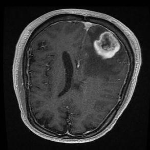

1/1 [==============================] - 0s 28ms/step
Imagem y756.jpg: Sem Tumor.


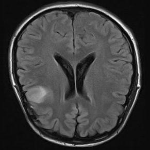

1/1 [==============================] - 0s 25ms/step
Imagem y729.jpg: Sem Tumor.


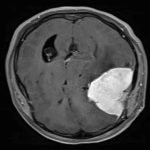

1/1 [==============================] - 0s 26ms/step
Imagem y762.jpg: Sem Tumor.


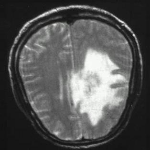

1/1 [==============================] - 0s 27ms/step
Imagem y785.jpg: Tumor Detectado!


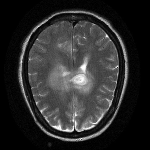

1/1 [==============================] - 0s 26ms/step
Imagem y728.jpg: Sem Tumor.


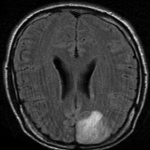

1/1 [==============================] - 0s 31ms/step
Imagem y773.jpg: Sem Tumor.


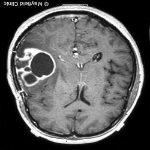

1/1 [==============================] - 0s 27ms/step
Imagem y763.jpg: Sem Tumor.


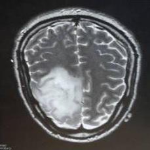

1/1 [==============================] - 0s 28ms/step
Imagem y791.jpg: Sem Tumor.


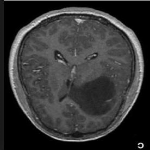

1/1 [==============================] - 0s 26ms/step
Imagem y764.jpg: Sem Tumor.


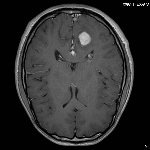

1/1 [==============================] - 0s 27ms/step
Imagem y732.jpg: Sem Tumor.


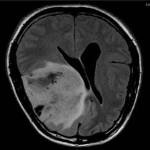

1/1 [==============================] - 0s 26ms/step
Imagem y767.jpg: Sem Tumor.


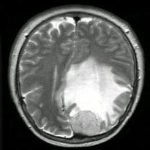

1/1 [==============================] - 0s 27ms/step
Imagem y742.jpg: Sem Tumor.


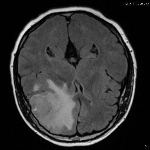

1/1 [==============================] - 0s 28ms/step
Imagem y799.jpg: Sem Tumor.


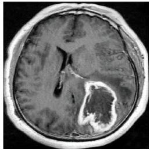

1/1 [==============================] - 0s 27ms/step
Imagem y790.jpg: Sem Tumor.


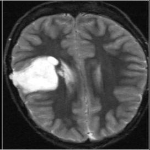

1/1 [==============================] - 0s 29ms/step
Imagem y737.jpg: Sem Tumor.


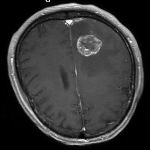

1/1 [==============================] - 0s 29ms/step
Imagem y723.jpg: Sem Tumor.


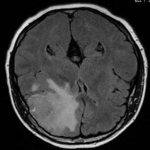

1/1 [==============================] - 0s 26ms/step
Imagem y710.jpg: Sem Tumor.


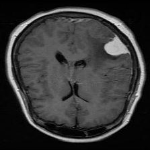

1/1 [==============================] - 0s 26ms/step
Imagem y781.jpg: Sem Tumor.


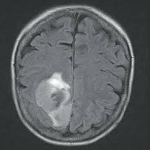

1/1 [==============================] - 0s 26ms/step
Imagem y727.jpg: Sem Tumor.


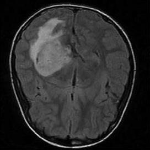

1/1 [==============================] - 0s 27ms/step
Imagem y739.jpg: Sem Tumor.


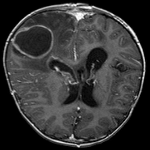

1/1 [==============================] - 0s 27ms/step
Imagem y754.jpg: Sem Tumor.


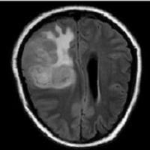

1/1 [==============================] - 0s 37ms/step
Imagem y761.jpg: Sem Tumor.


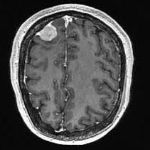

1/1 [==============================] - 0s 29ms/step
Imagem y757.jpg: Sem Tumor.


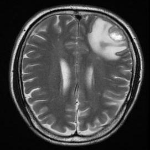

1/1 [==============================] - 0s 31ms/step
Imagem y712.jpg: Sem Tumor.


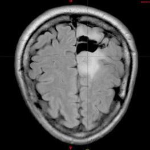

1/1 [==============================] - 0s 28ms/step
Imagem y722.jpg: Sem Tumor.


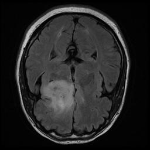

1/1 [==============================] - 0s 29ms/step
Imagem y704.jpg: Sem Tumor.


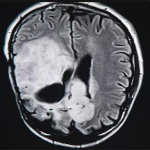

1/1 [==============================] - 0s 27ms/step
Imagem y719.jpg: Tumor Detectado!


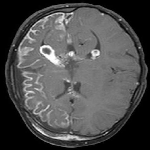

1/1 [==============================] - 0s 29ms/step
Imagem y780.jpg: Sem Tumor.


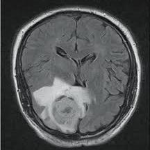

1/1 [==============================] - 0s 27ms/step
Imagem y752.jpg: Sem Tumor.


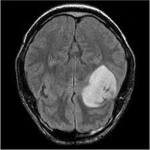

1/1 [==============================] - 0s 27ms/step
Imagem y795.jpg: Sem Tumor.


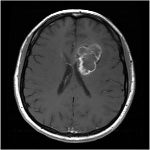

1/1 [==============================] - 0s 29ms/step
Imagem y800.jpg: Sem Tumor.


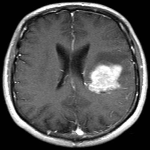

1/1 [==============================] - 0s 28ms/step
Imagem y786.jpg: Sem Tumor.


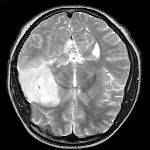

1/1 [==============================] - 0s 27ms/step
Imagem y784.jpg: Sem Tumor.


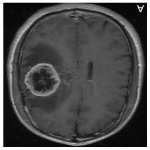

1/1 [==============================] - 0s 35ms/step
Imagem y796.jpg: Tumor Detectado!


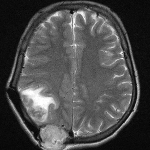

1/1 [==============================] - 0s 34ms/step
Imagem y713.jpg: Sem Tumor.


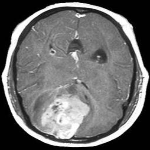

1/1 [==============================] - 0s 30ms/step
Imagem y743.jpg: Sem Tumor.


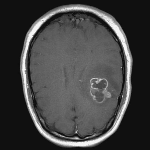

1/1 [==============================] - 0s 42ms/step
Imagem y741.jpg: Sem Tumor.


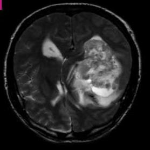

1/1 [==============================] - 0s 31ms/step
Imagem y769.jpg: Tumor Detectado!


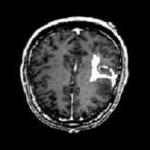

1/1 [==============================] - 0s 32ms/step
Imagem y746.jpg: Sem Tumor.


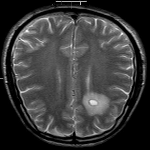

1/1 [==============================] - 0s 28ms/step
Imagem y779.jpg: Tumor Detectado!


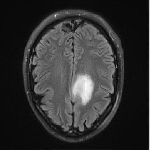

1/1 [==============================] - 0s 41ms/step
Imagem y768.jpg: Sem Tumor.


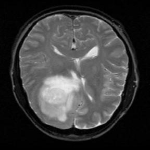

1/1 [==============================] - 0s 36ms/step
Imagem y771.jpg: Sem Tumor.


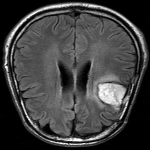

1/1 [==============================] - 0s 36ms/step
Imagem y792.jpg: Sem Tumor.


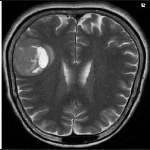

1/1 [==============================] - 0s 35ms/step
Imagem y703.jpg: Sem Tumor.


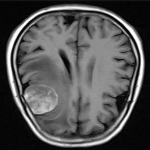

1/1 [==============================] - 0s 34ms/step
Imagem y702.jpg: Sem Tumor.


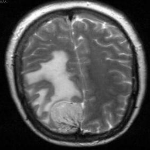

1/1 [==============================] - 0s 36ms/step
Imagem y718.jpg: Tumor Detectado!


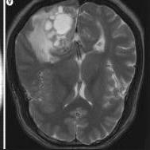

1/1 [==============================] - 0s 33ms/step
Imagem y715.jpg: Sem Tumor.


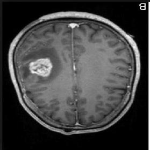

1/1 [==============================] - 0s 34ms/step
Imagem y782.jpg: Sem Tumor.


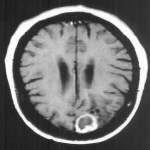

1/1 [==============================] - 0s 36ms/step
Imagem y740.jpg: Tumor Detectado!


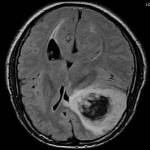

1/1 [==============================] - 0s 37ms/step
Imagem y725.jpg: Sem Tumor.


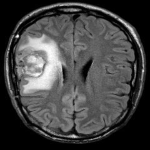

1/1 [==============================] - 0s 39ms/step
Imagem y708.jpg: Sem Tumor.


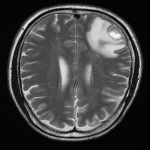

1/1 [==============================] - 0s 37ms/step
Imagem y775.jpg: Sem Tumor.


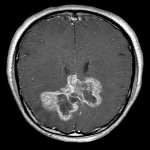

1/1 [==============================] - 0s 48ms/step
Imagem y748.jpg: Sem Tumor.


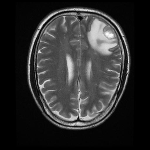

1/1 [==============================] - 0s 38ms/step
Imagem y772.jpg: Sem Tumor.


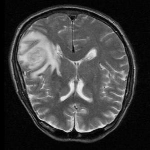

1/1 [==============================] - 0s 37ms/step
Imagem y789.jpg: Tumor Detectado!


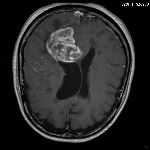

1/1 [==============================] - 0s 58ms/step
Imagem y744.jpg: Sem Tumor.


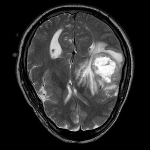

1/1 [==============================] - 0s 37ms/step
Imagem y720.jpg: Sem Tumor.


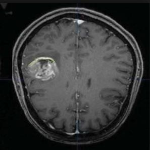

1/1 [==============================] - 0s 80ms/step
Imagem y753.jpg: Sem Tumor.


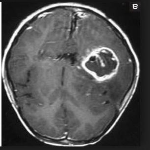

1/1 [==============================] - 0s 63ms/step
Imagem y777.jpg: Sem Tumor.


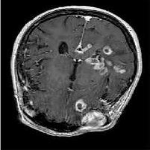

1/1 [==============================] - 0s 63ms/step
Imagem y794.jpg: Sem Tumor.


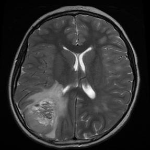

1/1 [==============================] - 0s 41ms/step
Imagem y738.jpg: Sem Tumor.


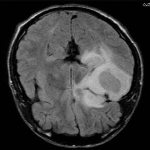

1/1 [==============================] - 0s 37ms/step
Imagem y760.jpg: Tumor Detectado!


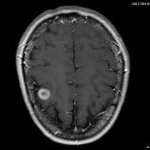

1/1 [==============================] - 0s 62ms/step
Imagem y717.jpg: Sem Tumor.


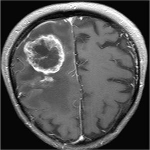

1/1 [==============================] - 0s 40ms/step
Imagem y726.jpg: Sem Tumor.


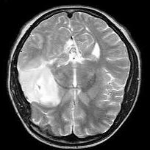

1/1 [==============================] - 0s 48ms/step
Imagem y721.jpg: Sem Tumor.


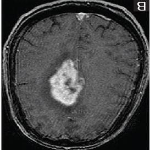

1/1 [==============================] - 0s 45ms/step
Imagem y731.jpg: Sem Tumor.


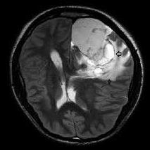

1/1 [==============================] - 0s 48ms/step
Imagem y778.jpg: Sem Tumor.


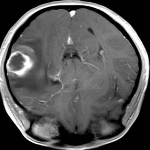

1/1 [==============================] - 0s 48ms/step
Imagem y793.jpg: Sem Tumor.


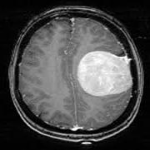

1/1 [==============================] - 0s 48ms/step
Imagem y714.jpg: Sem Tumor.


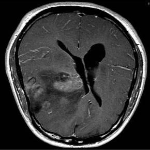

1/1 [==============================] - 0s 60ms/step
Imagem y751.jpg: Sem Tumor.


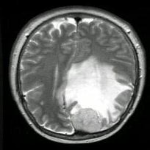

1/1 [==============================] - 0s 55ms/step
Imagem y709.jpg: Sem Tumor.


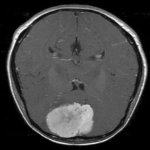

1/1 [==============================] - 0s 43ms/step
Imagem y735.jpg: Sem Tumor.


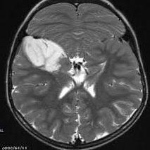

1/1 [==============================] - 0s 45ms/step
Imagem y776.jpg: Sem Tumor.


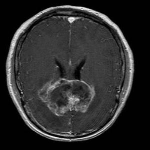

1/1 [==============================] - 0s 53ms/step
Imagem y733.jpg: Sem Tumor.


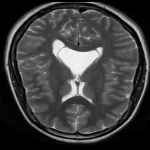

1/1 [==============================] - 0s 46ms/step
Imagem y747.jpg: Sem Tumor.


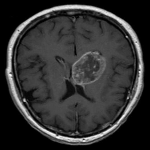

1/1 [==============================] - 0s 51ms/step
Imagem y750.jpg: Tumor Detectado!


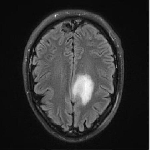

1/1 [==============================] - 0s 44ms/step
Imagem y745.jpg: Tumor Detectado!


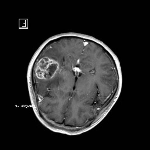

1/1 [==============================] - 0s 89ms/step
Imagem y770.jpg: Sem Tumor.


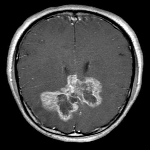

1/1 [==============================] - 0s 56ms/step
Imagem y711.jpg: Sem Tumor.


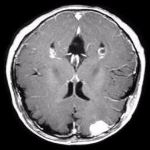

1/1 [==============================] - 0s 40ms/step
Imagem y798.jpg: Sem Tumor.


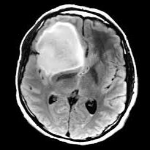

1/1 [==============================] - 0s 41ms/step
Imagem y759.jpg: Sem Tumor.


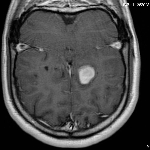

1/1 [==============================] - 0s 44ms/step
Imagem y730.jpg: Sem Tumor.


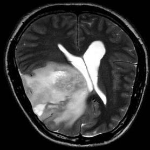

1/1 [==============================] - 0s 47ms/step
Imagem y758.jpg: Tumor Detectado!


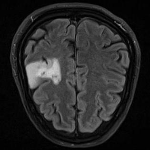

1/1 [==============================] - 0s 40ms/step
Imagem y787.jpg: Sem Tumor.


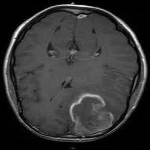

1/1 [==============================] - 0s 36ms/step
Imagem y707.jpg: Tumor Detectado!


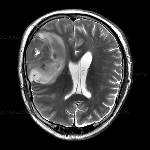

1/1 [==============================] - 0s 60ms/step
Imagem y788.jpg: Sem Tumor.


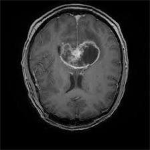

1/1 [==============================] - 0s 36ms/step
Imagem y706.jpg: Sem Tumor.


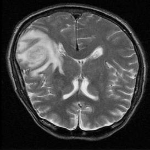

1/1 [==============================] - 0s 47ms/step
Imagem y783.jpg: Sem Tumor.


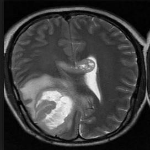

1/1 [==============================] - 0s 62ms/step
Imagem y701.jpg: Sem Tumor.


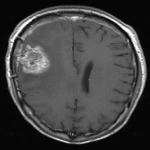

1/1 [==============================] - 0s 66ms/step
Imagem y766.jpg: Sem Tumor.


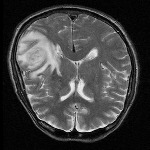

1/1 [==============================] - 0s 47ms/step
Imagem y765.jpg: Sem Tumor.


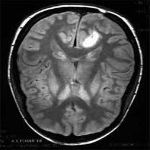

1/1 [==============================] - 0s 58ms/step
Imagem y774.jpg: Sem Tumor.


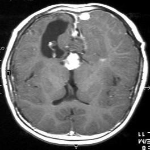

1/1 [==============================] - 0s 58ms/step
Imagem y734.jpg: Sem Tumor.


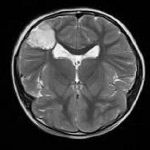

1/1 [==============================] - 0s 46ms/step
Imagem y736.jpg: Sem Tumor.


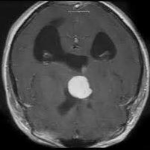

1/1 [==============================] - 0s 43ms/step
Imagem y724.jpg: Sem Tumor.


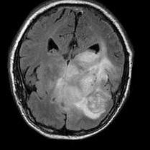

1/1 [==============================] - 0s 44ms/step
Imagem y716.jpg: Sem Tumor.


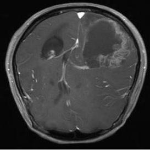

1/1 [==============================] - 0s 46ms/step
Imagem y797.jpg: Sem Tumor.


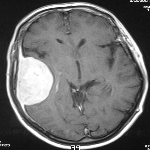

1/1 [==============================] - 0s 53ms/step
Imagem y749.jpg: Sem Tumor.


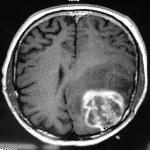

1/1 [==============================] - 0s 56ms/step
Imagem y705.jpg: Sem Tumor.


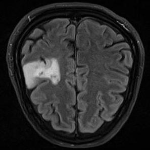

In [26]:
# Testar o modelo em novas imagens

# Diretório contendo imagens para teste
diretorio_teste = "/content/teste"

for filename in os.listdir(diretorio_teste):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        caminho_imagem_teste = os.path.join(diretorio_teste, filename)
        imagem_teste = cv2.imread(caminho_imagem_teste)

        # Redimensionar a imagem para o tamanho esperado pelo modelo
        imagem_teste_redimensionada = cv2.resize(imagem_teste, (150, 150))

        caracteristicas_teste = extrair_caracteristicas(imagem_teste_redimensionada)
        caracteristicas_teste = np.array([caracteristicas_teste])

        # Realizar a predição usando o modelo treinado
        resultado_predicao = modelo.predict(caracteristicas_teste)

        # Interpretar o resultado
        if resultado_predicao[0][0] > 0.5:
            print(f"Imagem {filename}: Tumor Detectado!")
        else:
            print(f"Imagem {filename}: Sem Tumor.")

        # Exibir a imagem
        from google.colab.patches import cv2_imshow
        cv2_imshow(imagem_teste_redimensionada)
        cv2.waitKey(0)
        cv2.destroyAllWindows()